In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

def filtering_func(freqs, fft, f1, f2): #passing 1d complex array
    filtered_fft = fft.copy() #in this way it doesn't reference to fft

    fft_in_range = np.abs(fft[(freqs >= f1) & (freqs <= f2) | (freqs >= -f2) & (freqs <= -f1)])

    peak = np.max(fft_in_range)

    peak_indices = np.where(fft_in_range == peak)[0]
    print(f"peak_indices: {peak_indices}")

    peak_f = freqs[(freqs >= f1) & (freqs <= f2) | (freqs >= -f2) & (freqs <= -f1)][peak_indices]
    print(f"peak_f: {peak_f}")

    fft_in_range[peak_indices] = np.nan
    range_avg = np.nanmean(fft_in_range) #excluding the point you are filtering

    print(f'sum: {np.sum(np.isin(freqs, peak_f))}') #make sure you are filtering only 1 frequency
    filtered_fft[np.isin(freqs, peak_f)] = complex(range_avg, 0)
    return filtered_fft, range_avg, peak_f #returning a 1d complex array

In [2]:
hour = '15.42'
day = '08082024'

In [3]:
file = f"../../Waveforms/{day}/{day}_{hour}/{day}_{hour}_wf.csv/{day}_{hour}_wf_01.csv"

df = pd.read_csv(file)
print(df)
times = pd.to_numeric(df.iloc[1:, 0], errors = 'coerce').values #errors = 'coerce' converts invalid parsing values (such as strings that can't be converted to numbers) into NaN
amplitudes = pd.to_numeric(df.iloc[1:, 1], errors='coerce').values 

              Time    Channel D
0             (us)         (mV)
1       0.00000000  -1.96850400
2       0.00080000  -1.57480300
3       0.00160000  -1.18110200
4       0.00240000  -0.78740150
...            ...          ...
62500  49.99920067   0.00000000
62501  50.00000067   0.39370070
62502  50.00080067  -0.39370070
62503  50.00160067  -1.18110200
62504  50.00240067  -1.18110200

[62505 rows x 2 columns]


In [4]:
N = len(times)
print(f"len(times): {N}")

len(times): 62504


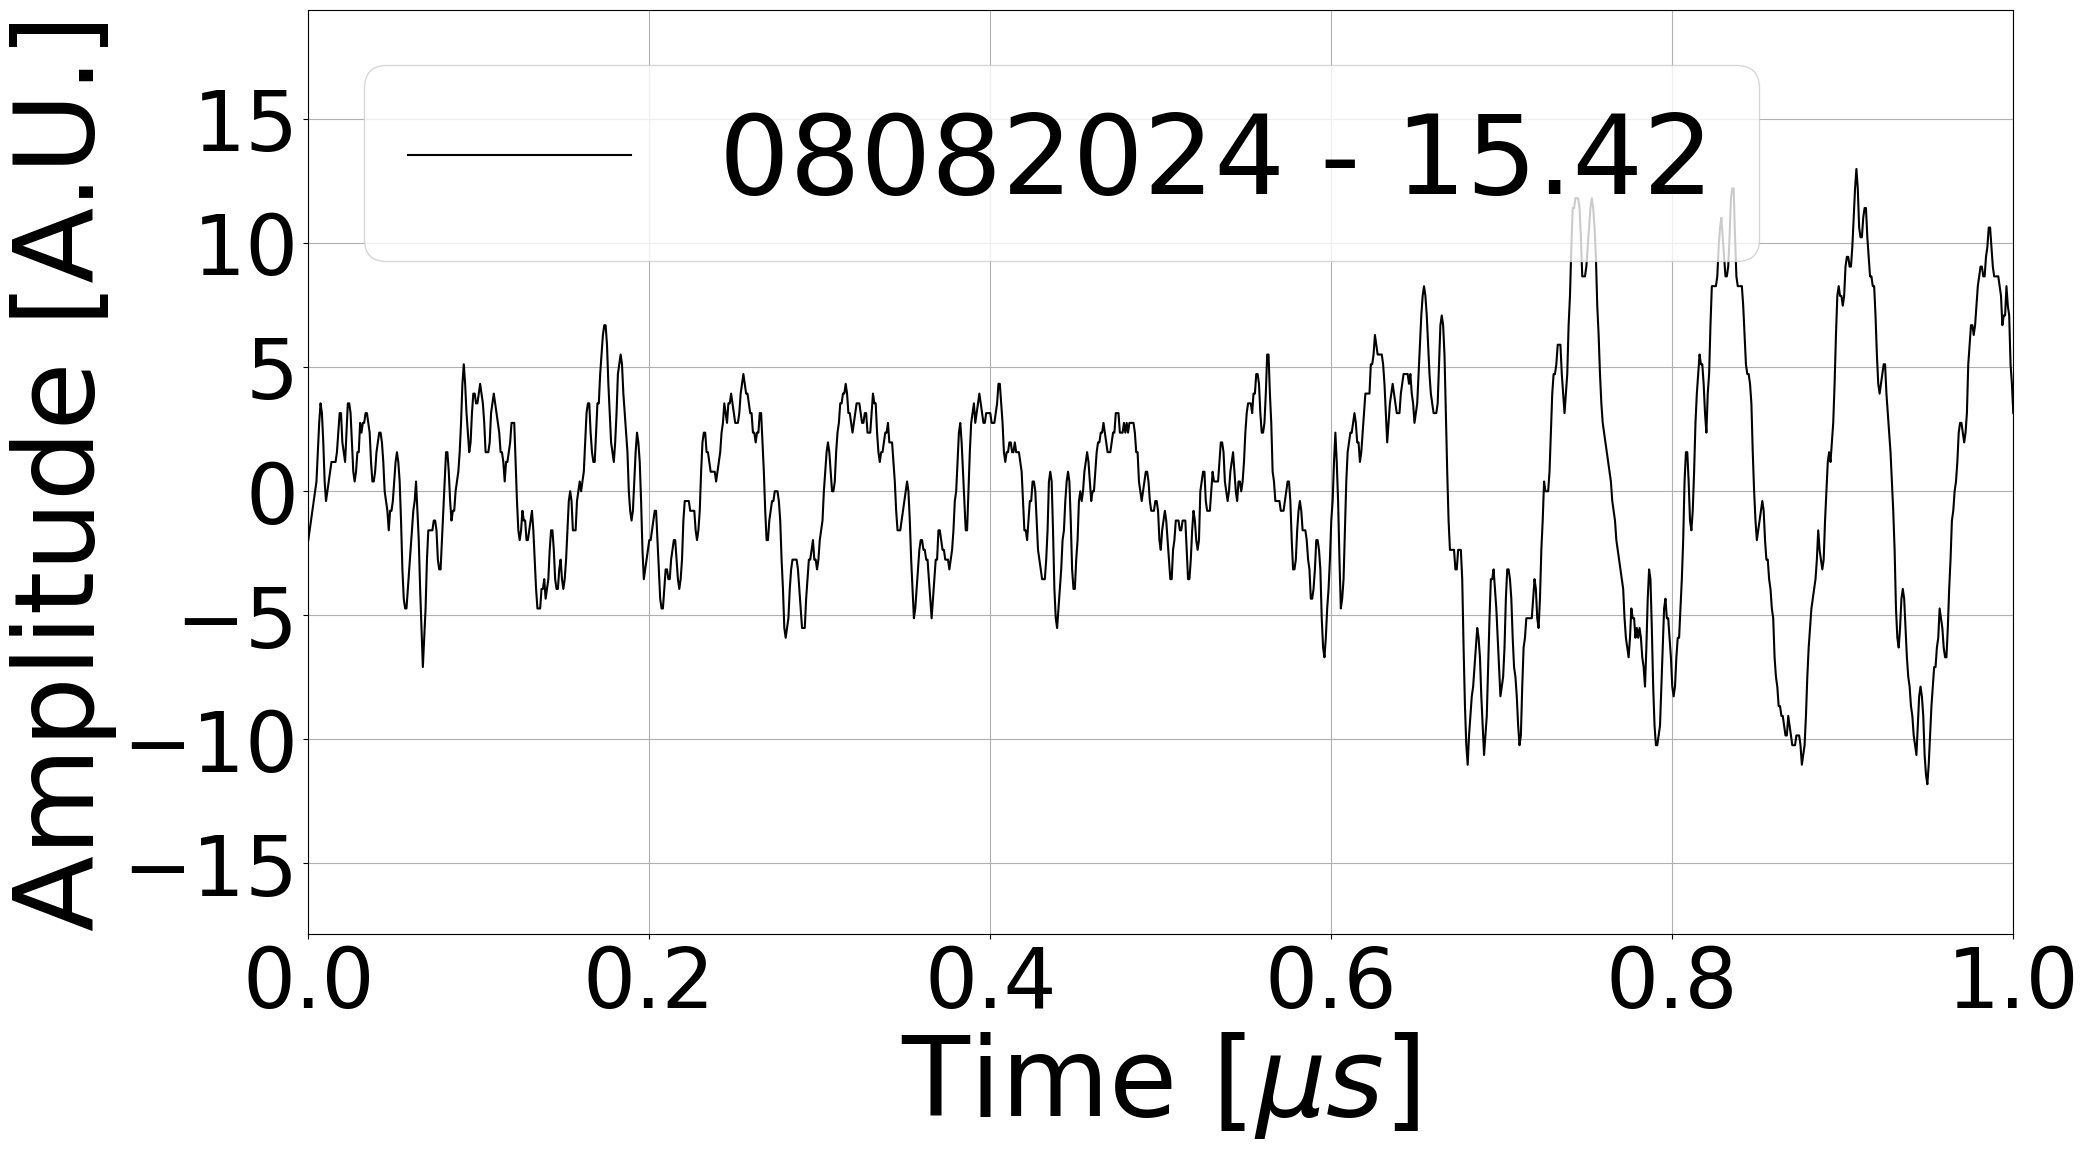

In [5]:
plt.figure(figsize = (22, 12))
plt.plot(times, amplitudes, label = '08082024 - 15.42', color = 'k')

plt.title('', fontsize = 80)
plt.xlabel(r'Time [$\mu s$]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Amplitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 80)
plt.grid(True)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("../Results/080824_15.42/Presentation/single_wf.pdf", format = "pdf", bbox_inches="tight")
plt.show()

## FFT

In [6]:
span = times[-1]
print(f"span: {span}") 
step = span / N
f_s = 1 / step
print(f"f_s = {f_s}")

freqs = fft.fftfreq(N, 1/f_s) #window lenght, sample spacing
print(f'last freq: {freqs[-1]}') #this should be the half of f_s.
print(f"len(freqs): {len(freqs)}")
print(freqs)

span: 50.00240067
f_s = 1250.0199822905824
last freq: -0.019999039778103522
len(freqs): 62504
[ 0.          0.01999904  0.03999808 ... -0.05999712 -0.03999808
 -0.01999904]


In [7]:
magnitudes = fft.fft(amplitudes)
n = np.max(np.abs(magnitudes))

phases = np.angle(magnitudes)

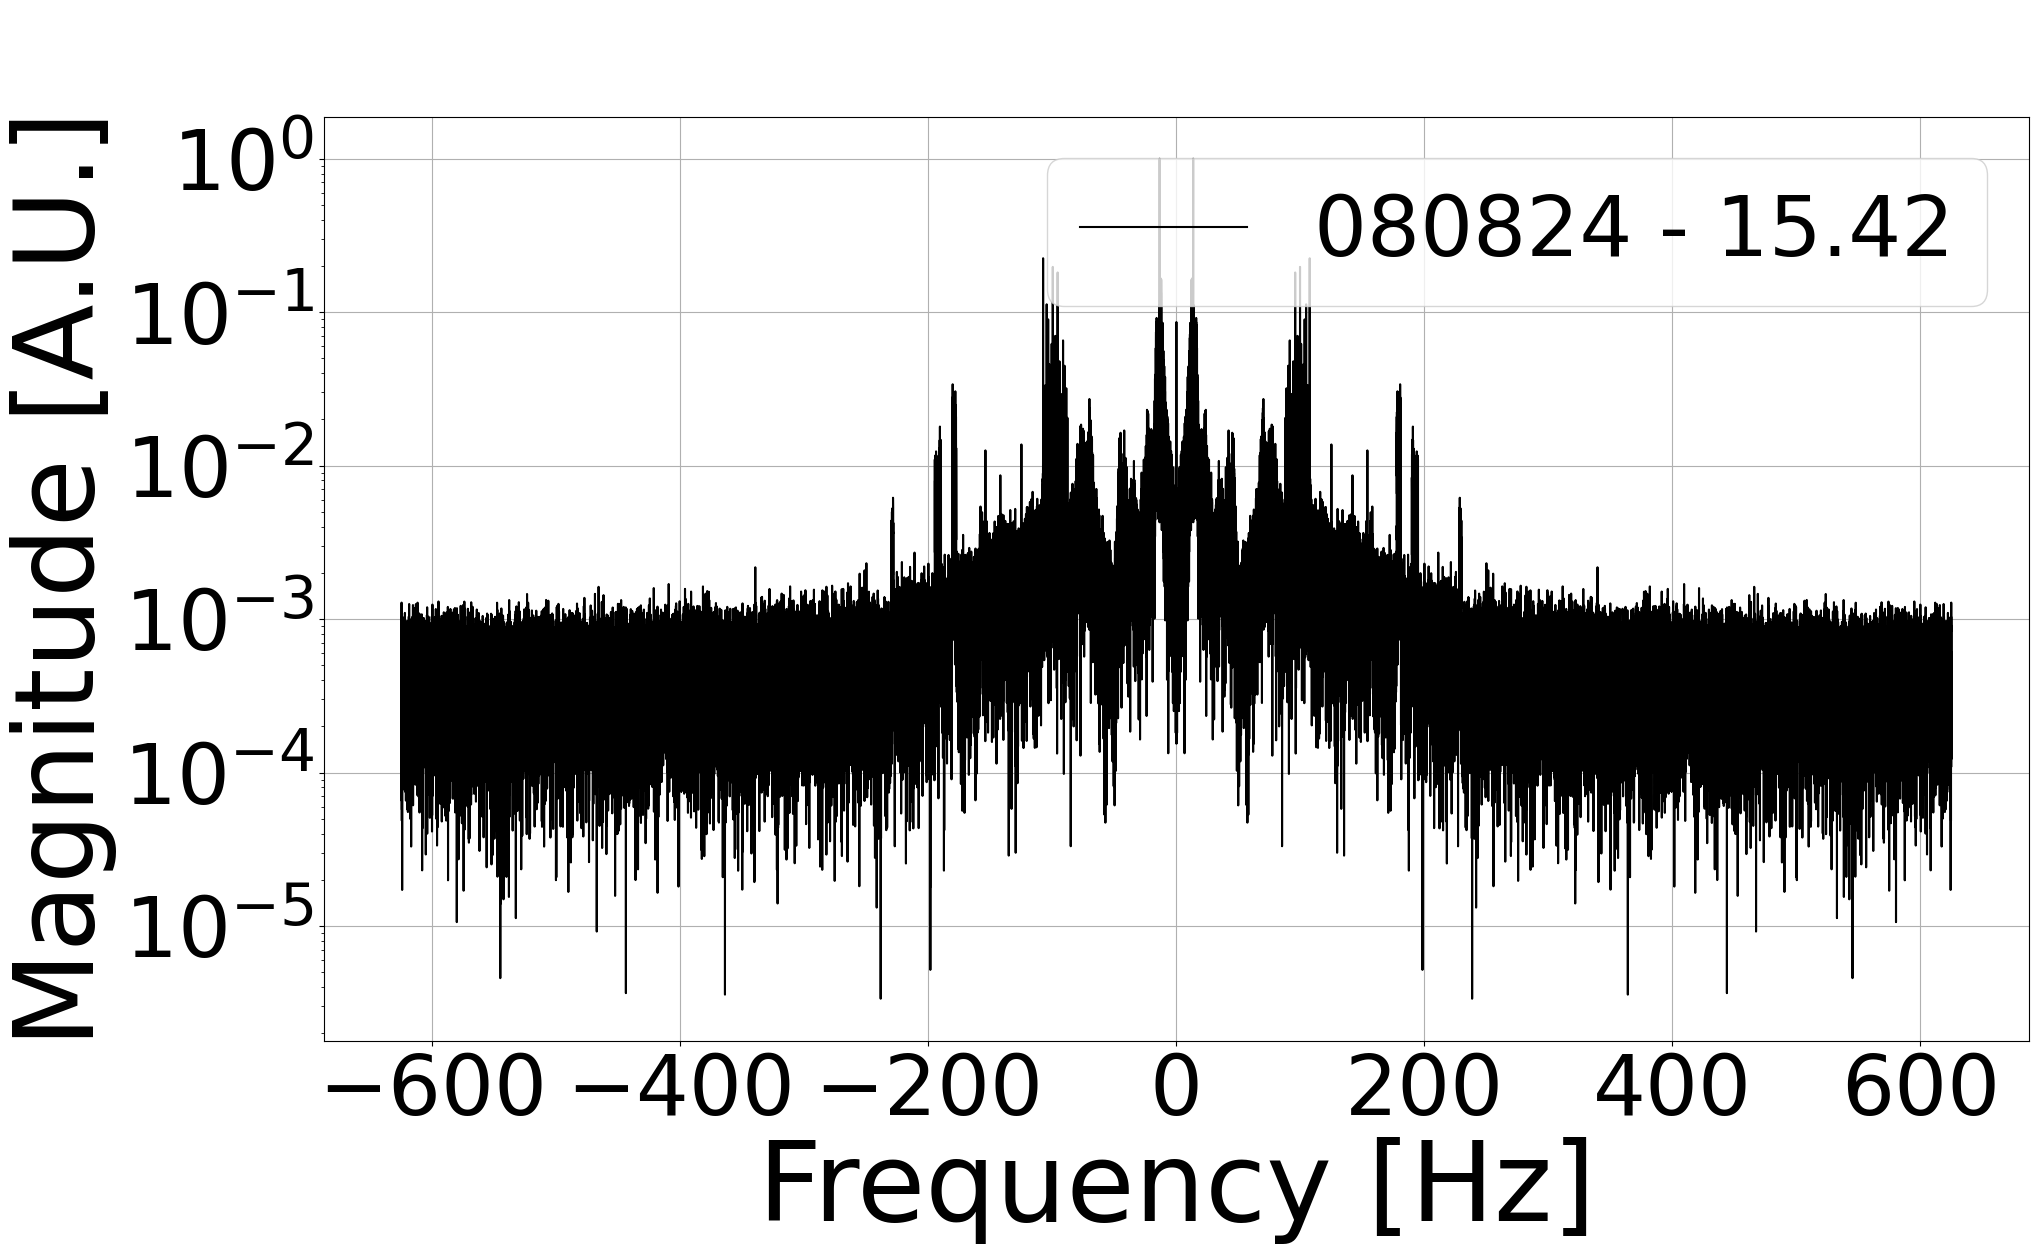

In [8]:
freqs_shifted = fft.fftshift(freqs)
magnitudes_shifted = fft.fftshift(magnitudes)

plt.figure(figsize=(22, 12))
plt.plot(freqs_shifted, np.abs(magnitudes_shifted)/n, color = 'k', label = '080824 - 15.42')
plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [Hz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.semilogy()
plt.legend(fontsize = 60)
plt.grid(True)

#plt.savefig("Results/simple_fft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [9]:
if (N%2 == 0):
    pos_freqs = freqs[:round((N/2))]
    pos_magnitudes = magnitudes[:round((N/2))]
    pos_phases = phases[:round((N/2))]
else:
    pos_freqs = freqs[:round((N-1)/2 + 1)]
    pos_magnitudes = magnitudes[:round((N-1)/2 + 1)]
    pos_phases = phases[:round((N-1)/2 + 1)]

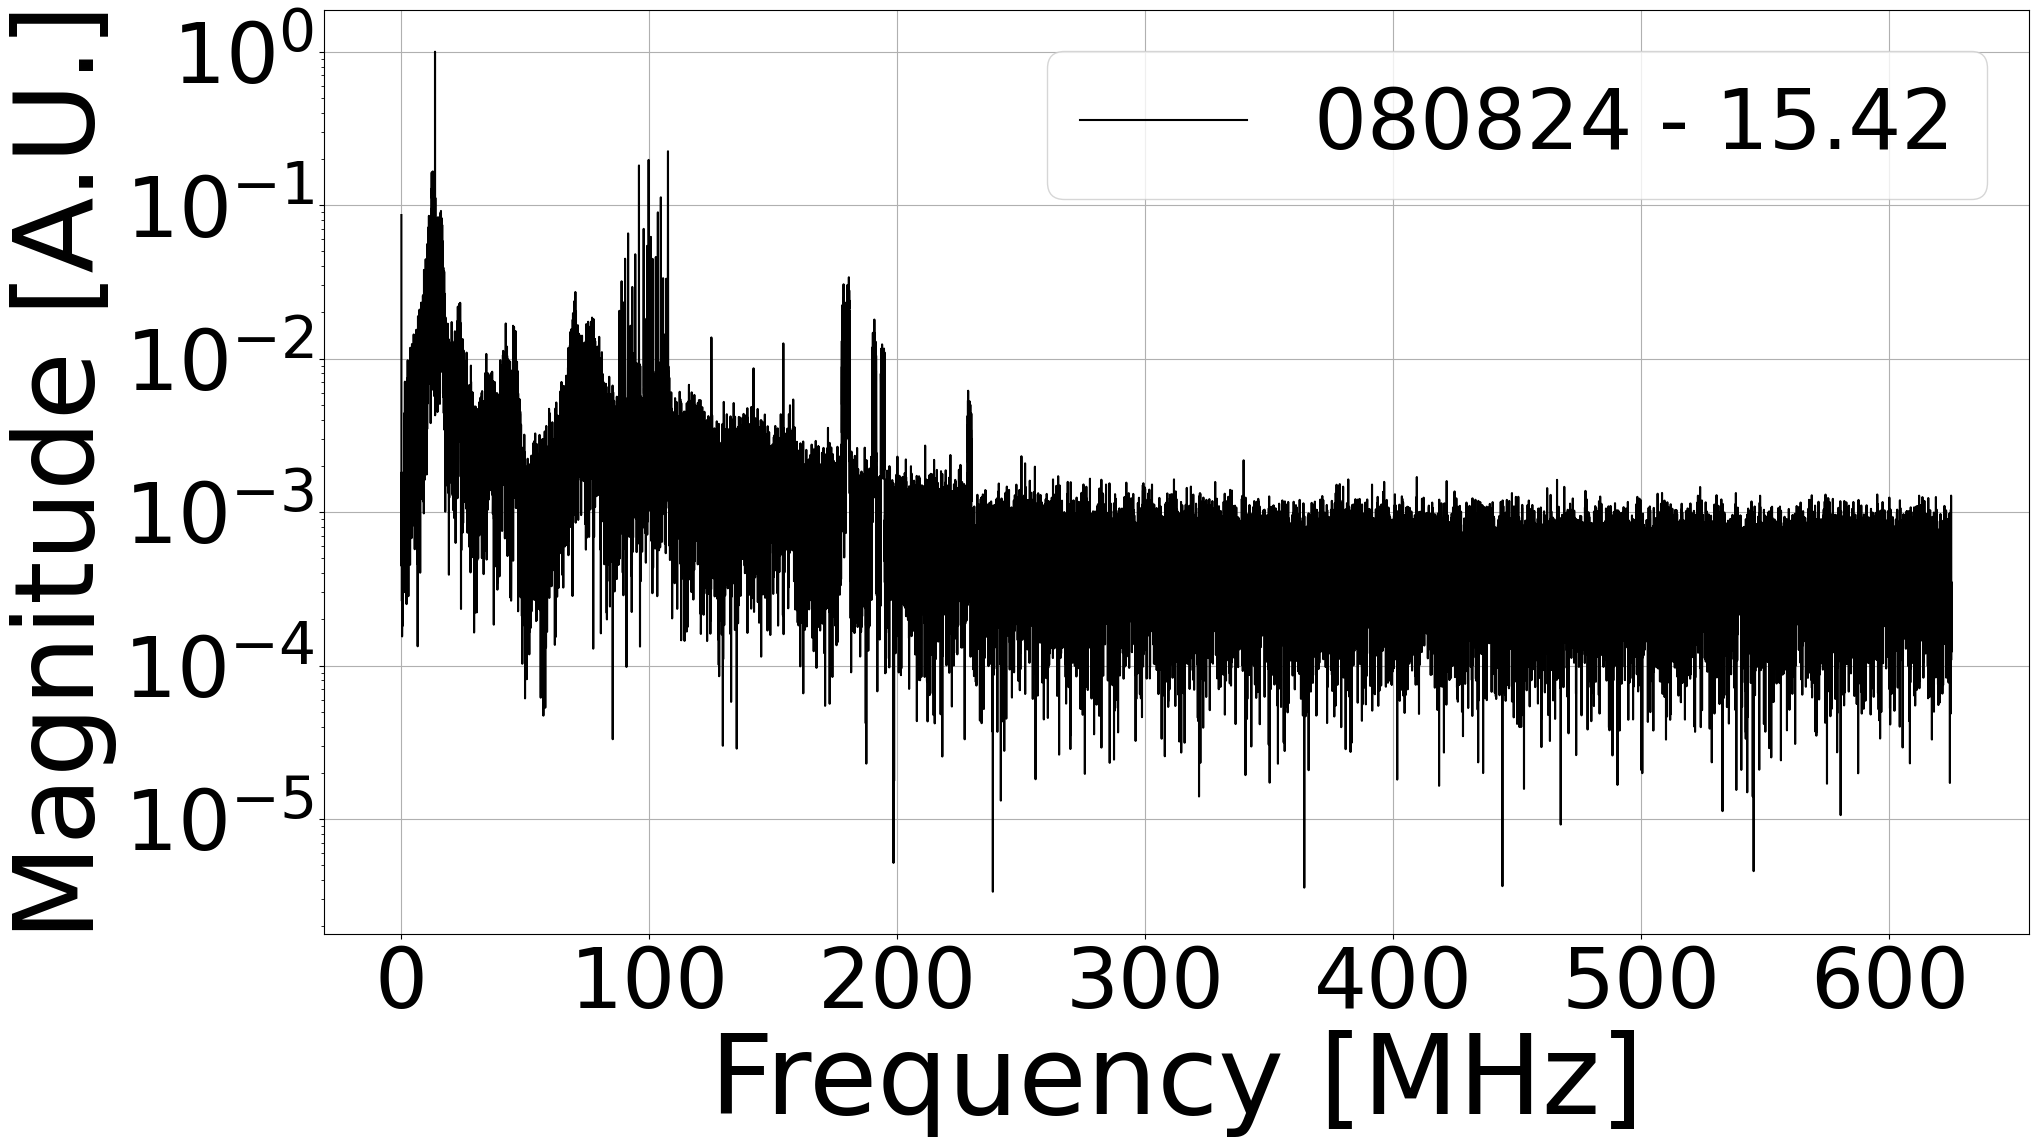

In [10]:
plt.figure(figsize=(22, 12))
plt.plot(pos_freqs, np.abs(pos_magnitudes)/n, color = 'k', label = '080824 - 15.42')

plt.title('', fontsize = 80)
plt.xlabel('Frequency [MHz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.semilogy()
plt.grid(True)
plt.legend(loc = 'best', fontsize = 60)

#plt.savefig("Results/simple_fft.png", format = "png", bbox_inches="tight")
plt.savefig("../Results/080824_15.42/Presentation/single_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

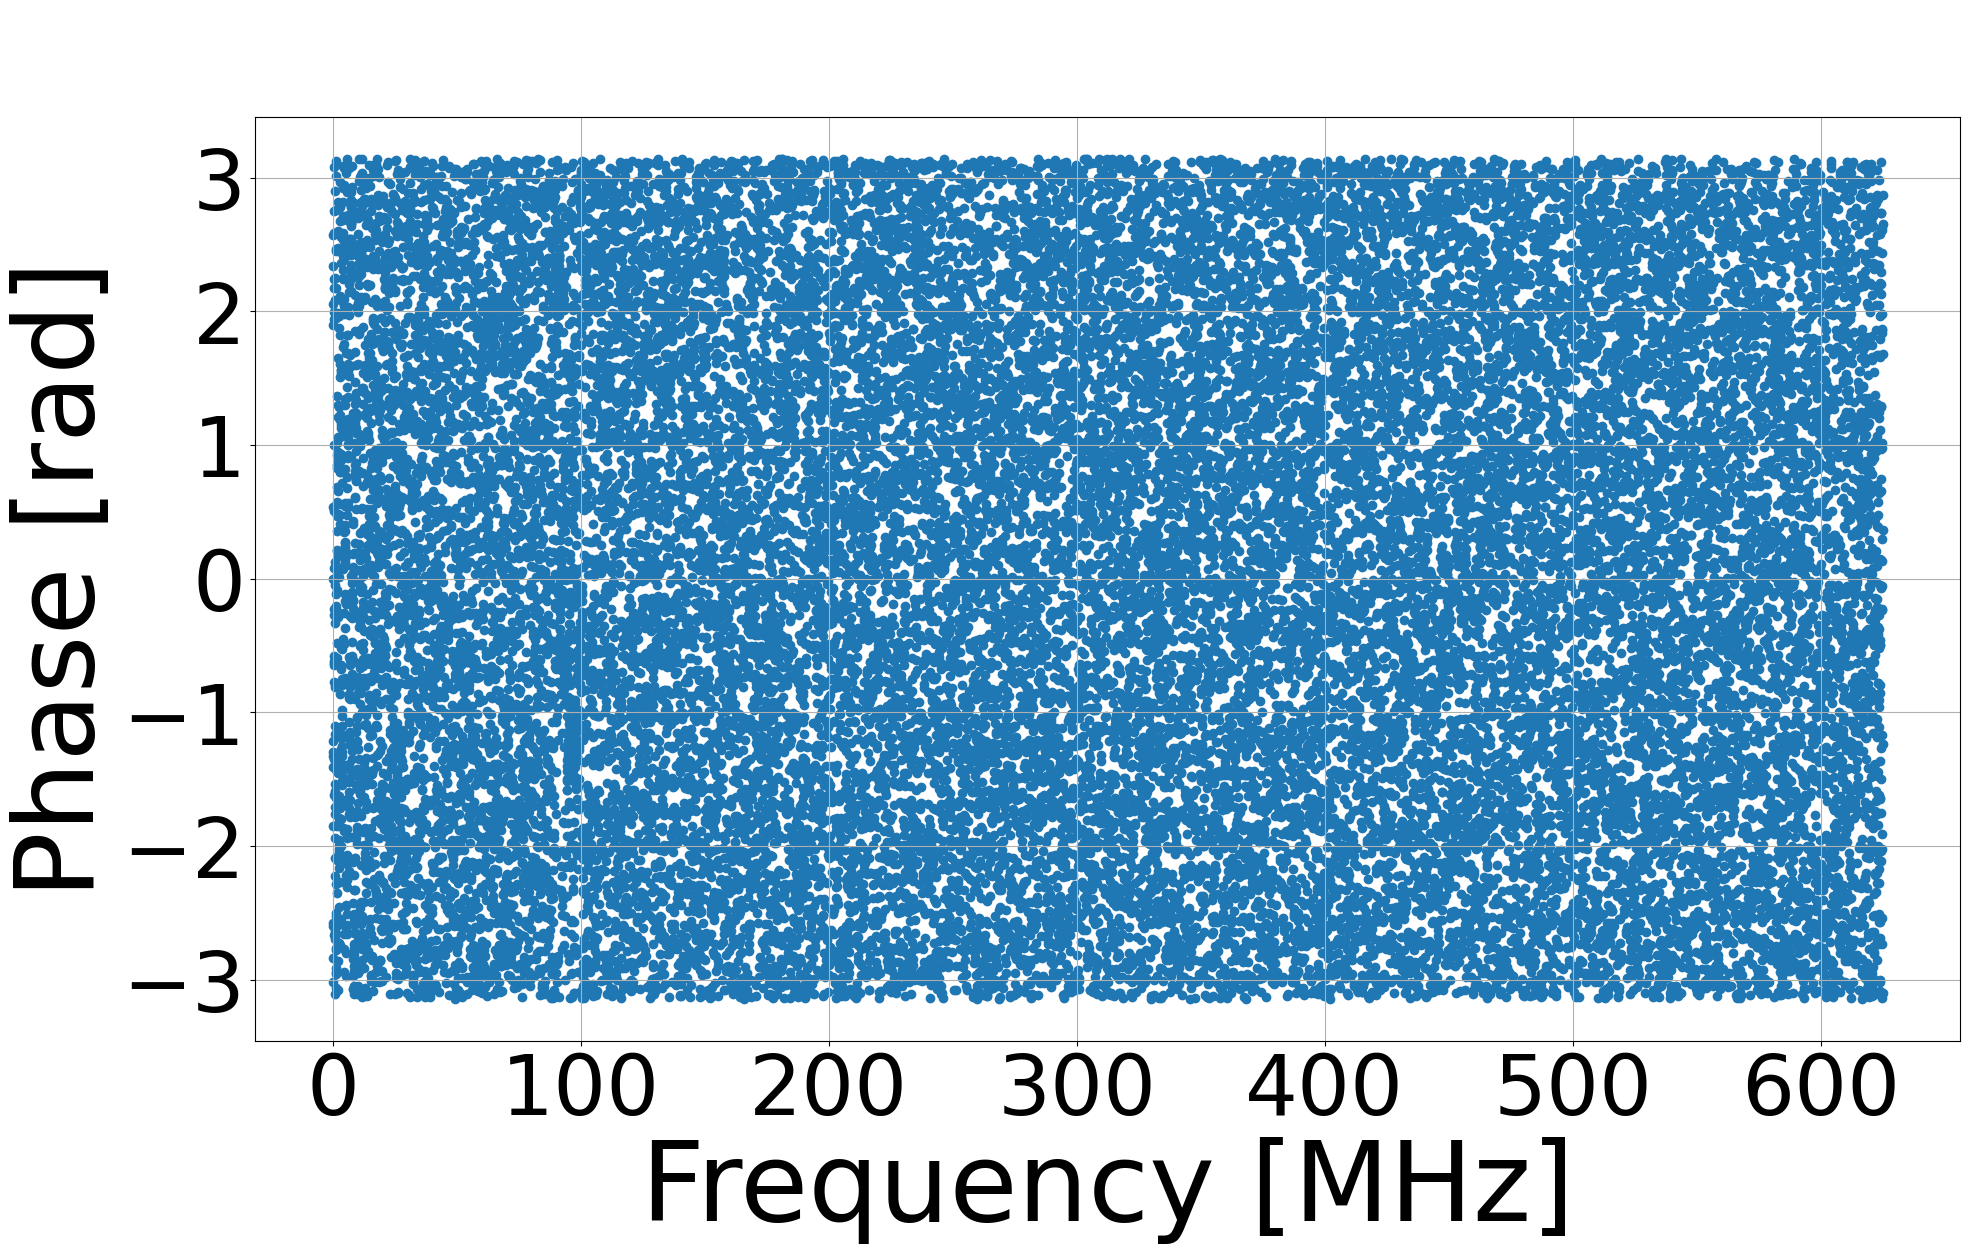

In [11]:
plt.figure(figsize=(22, 12))
plt.scatter(pos_freqs, pos_phases)

plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [MHz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Phase [rad]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [12]:
f1 = 13
f2 = 14

In [13]:
print(f"positive peak frequency: {pos_freqs[(pos_freqs >= f1) & (pos_freqs <= f2)][np.argmax(pos_magnitudes[(pos_freqs <= f2) & (pos_freqs >= f1)])]} MHz")
print(f"positive peak phase: {pos_phases[(pos_freqs >= f1) & (pos_freqs <= f2)][np.argmax(pos_magnitudes[(pos_freqs <= f2) & (pos_freqs >= f1)])]*180/np.pi} deg")

positive peak frequency: 13.679343208222809 MHz
positive peak phase: 19.324525707928867 deg


## Filtering

In [14]:
filtered_fft, range_avg, peak_f = filtering_func(freqs, magnitudes, f1, f2) #passing the complete spectrum

peak_indices: [27 72]
peak_f: [ 13.55934897 -13.55934897]
sum: 2


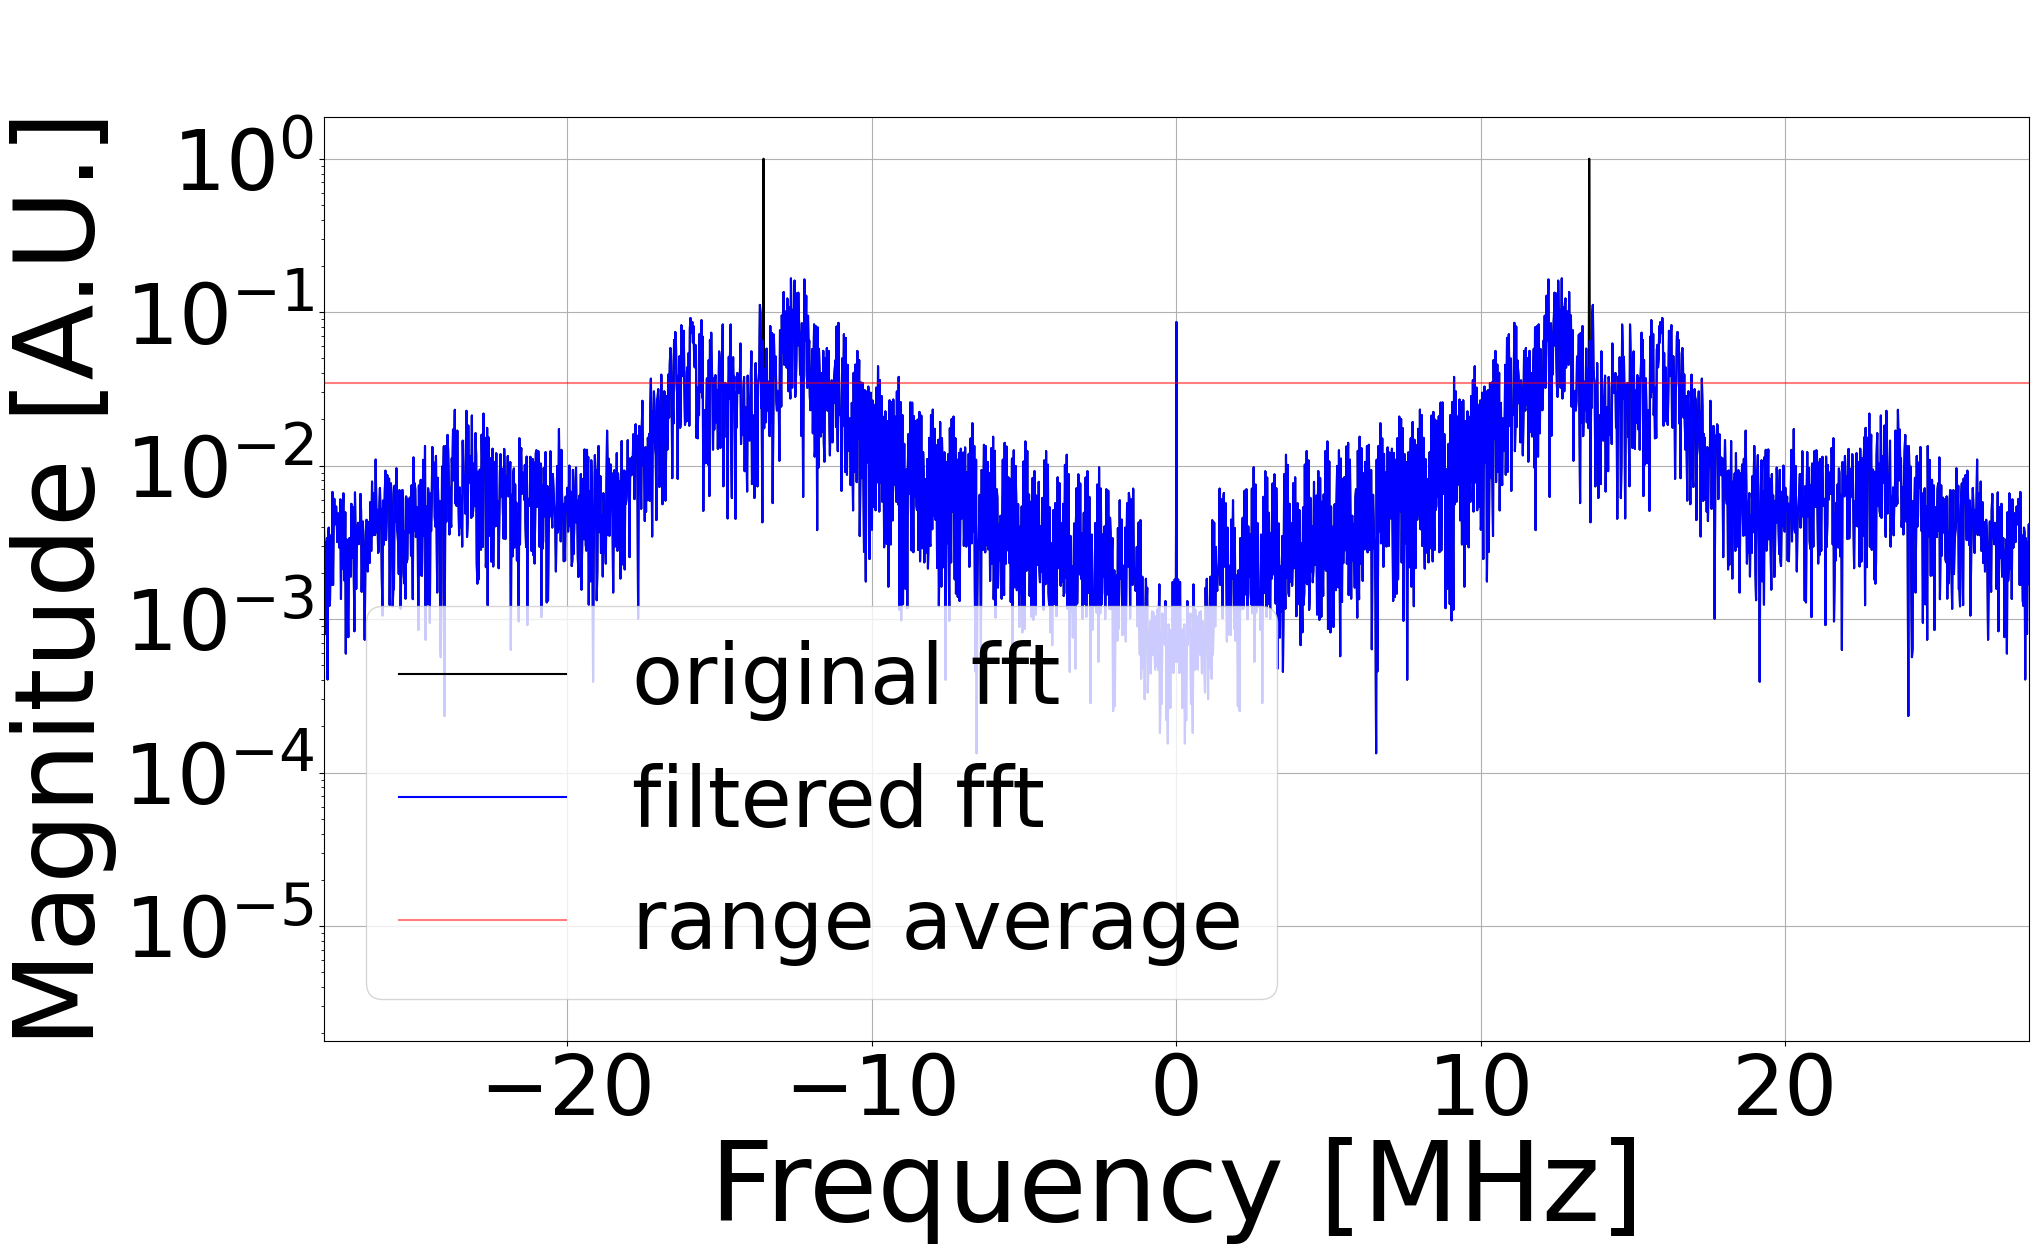

In [15]:
filtered_fft_shifted = fft.fftshift(filtered_fft)

plt.figure(figsize=(22, 12))
plt.plot(freqs_shifted, np.abs(magnitudes_shifted)/n, color = 'k', label = 'original fft')
plt.plot(freqs_shifted, np.abs(filtered_fft_shifted)/n, color = 'blue', label = 'filtered fft')
plt.axhline(range_avg/n, color = 'red', alpha = 0.5, label = 'range average')

plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [MHz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.xlim(-f2*2, f2*2)
plt.semilogy()
plt.legend(loc = 'lower left',fontsize = 60)

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [16]:
if (N%2 == 0):
    pos_filtered_fft = filtered_fft[:round((N/2))]
else:
    pos_filtered_fft = filtered_fft[:round((N-1)/2 + 1)]

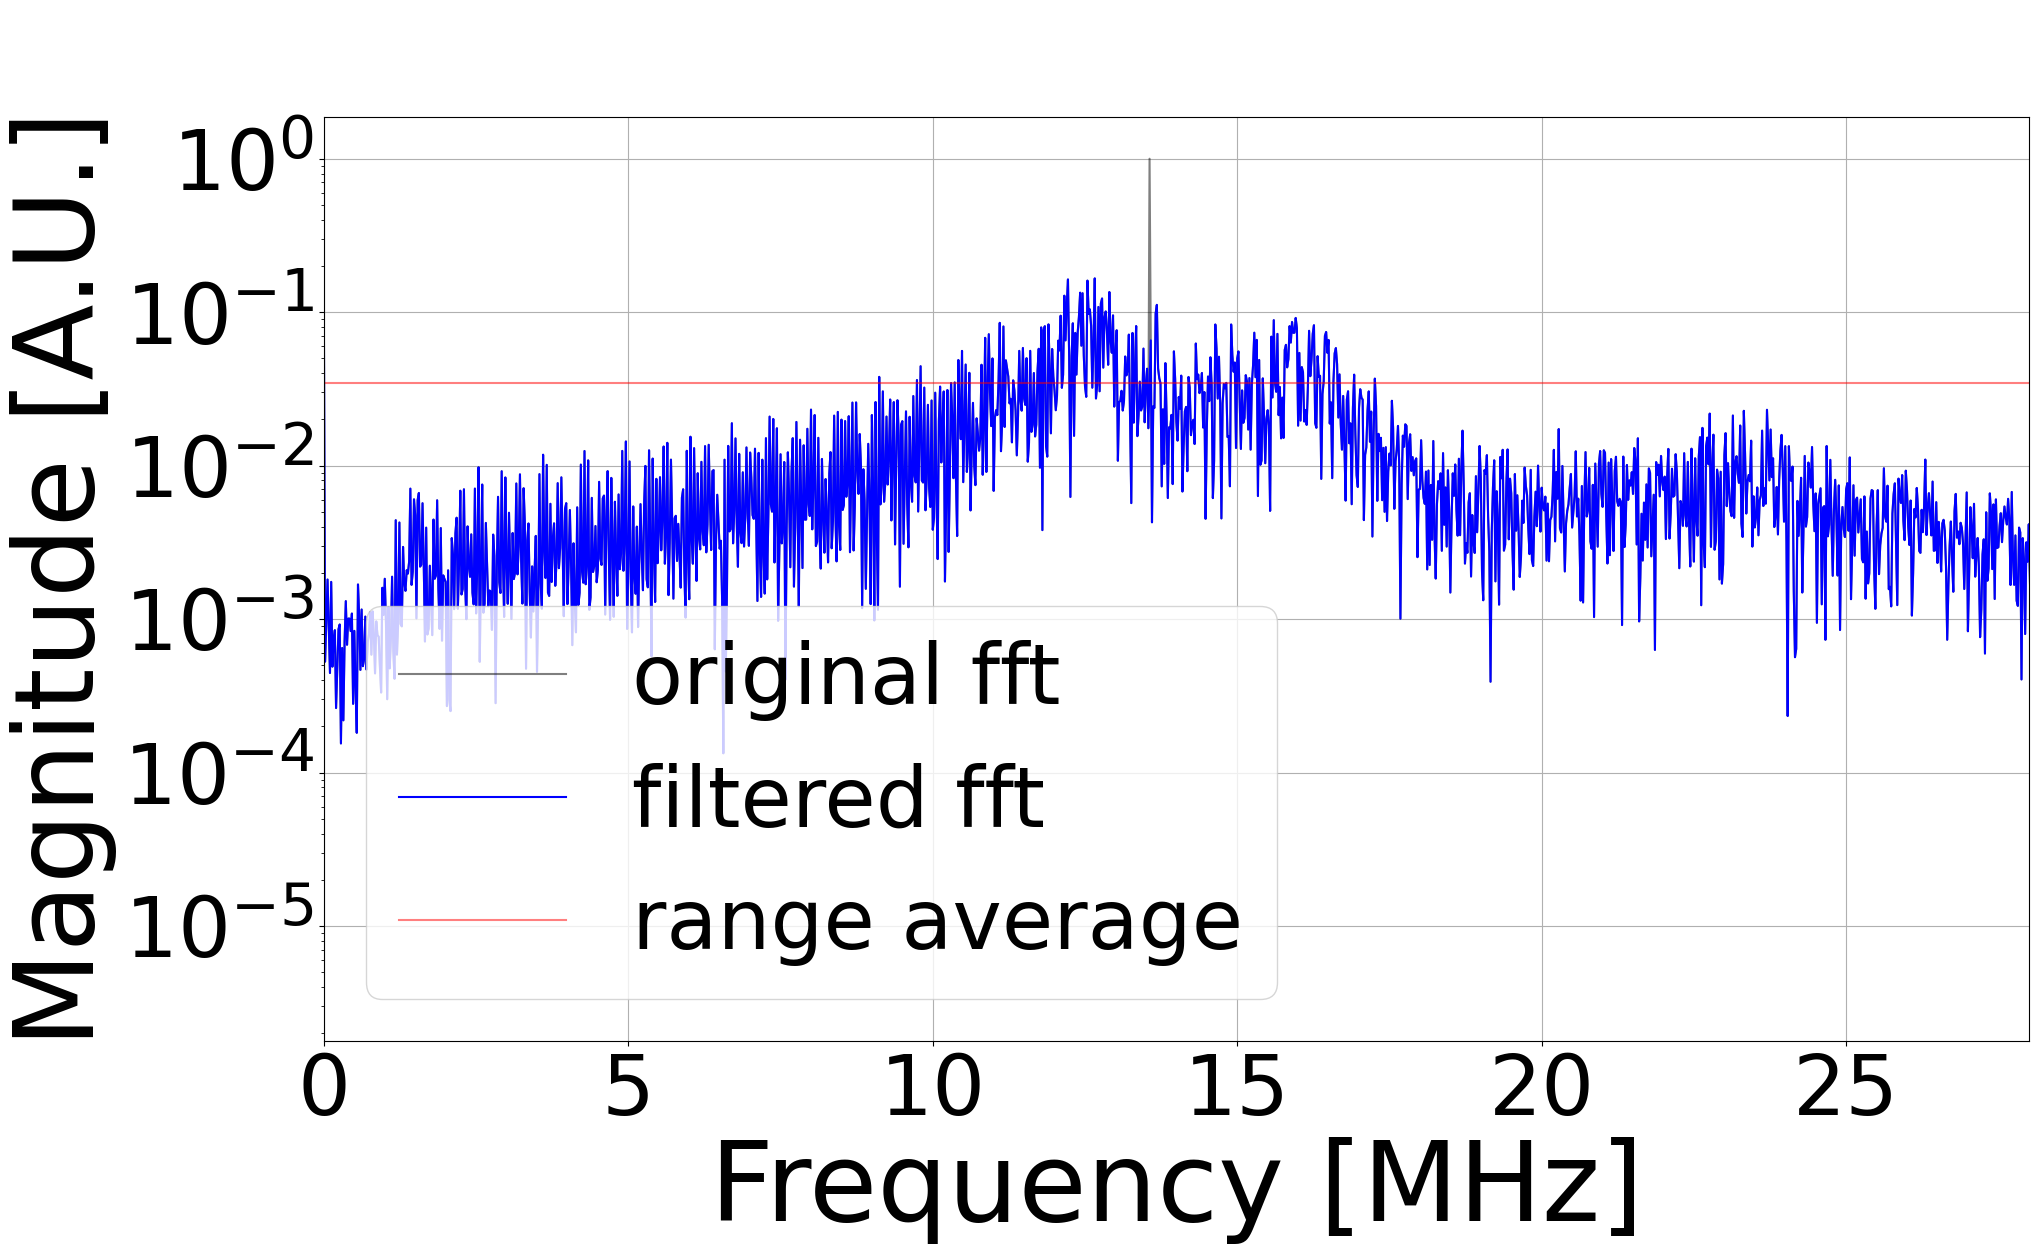

In [17]:
plt.figure(figsize=(22, 12))
plt.plot(pos_freqs, np.abs(pos_magnitudes)/n, alpha = 0.5, color = 'k', label = 'original fft')
plt.plot(pos_freqs, np.abs(pos_filtered_fft)/n, color = 'blue', label = 'filtered fft')
plt.axhline(range_avg/n, color = 'red', alpha = 0.5, label = 'range average')

plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [MHz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.xlim(0, f2*2)
plt.semilogy()
plt.legend(loc = 'lower left',fontsize = 60)

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

## IFFT

In [30]:
reconstructed_wf = fft.ifft(magnitudes)

In [19]:
#times_ifft = np.arange(N) / f_s #it's right but it's the SAME as times
filtered_wf = fft.ifft(filtered_fft) #complex numbers, whole spectrum

## Compare to reconstructed waveform

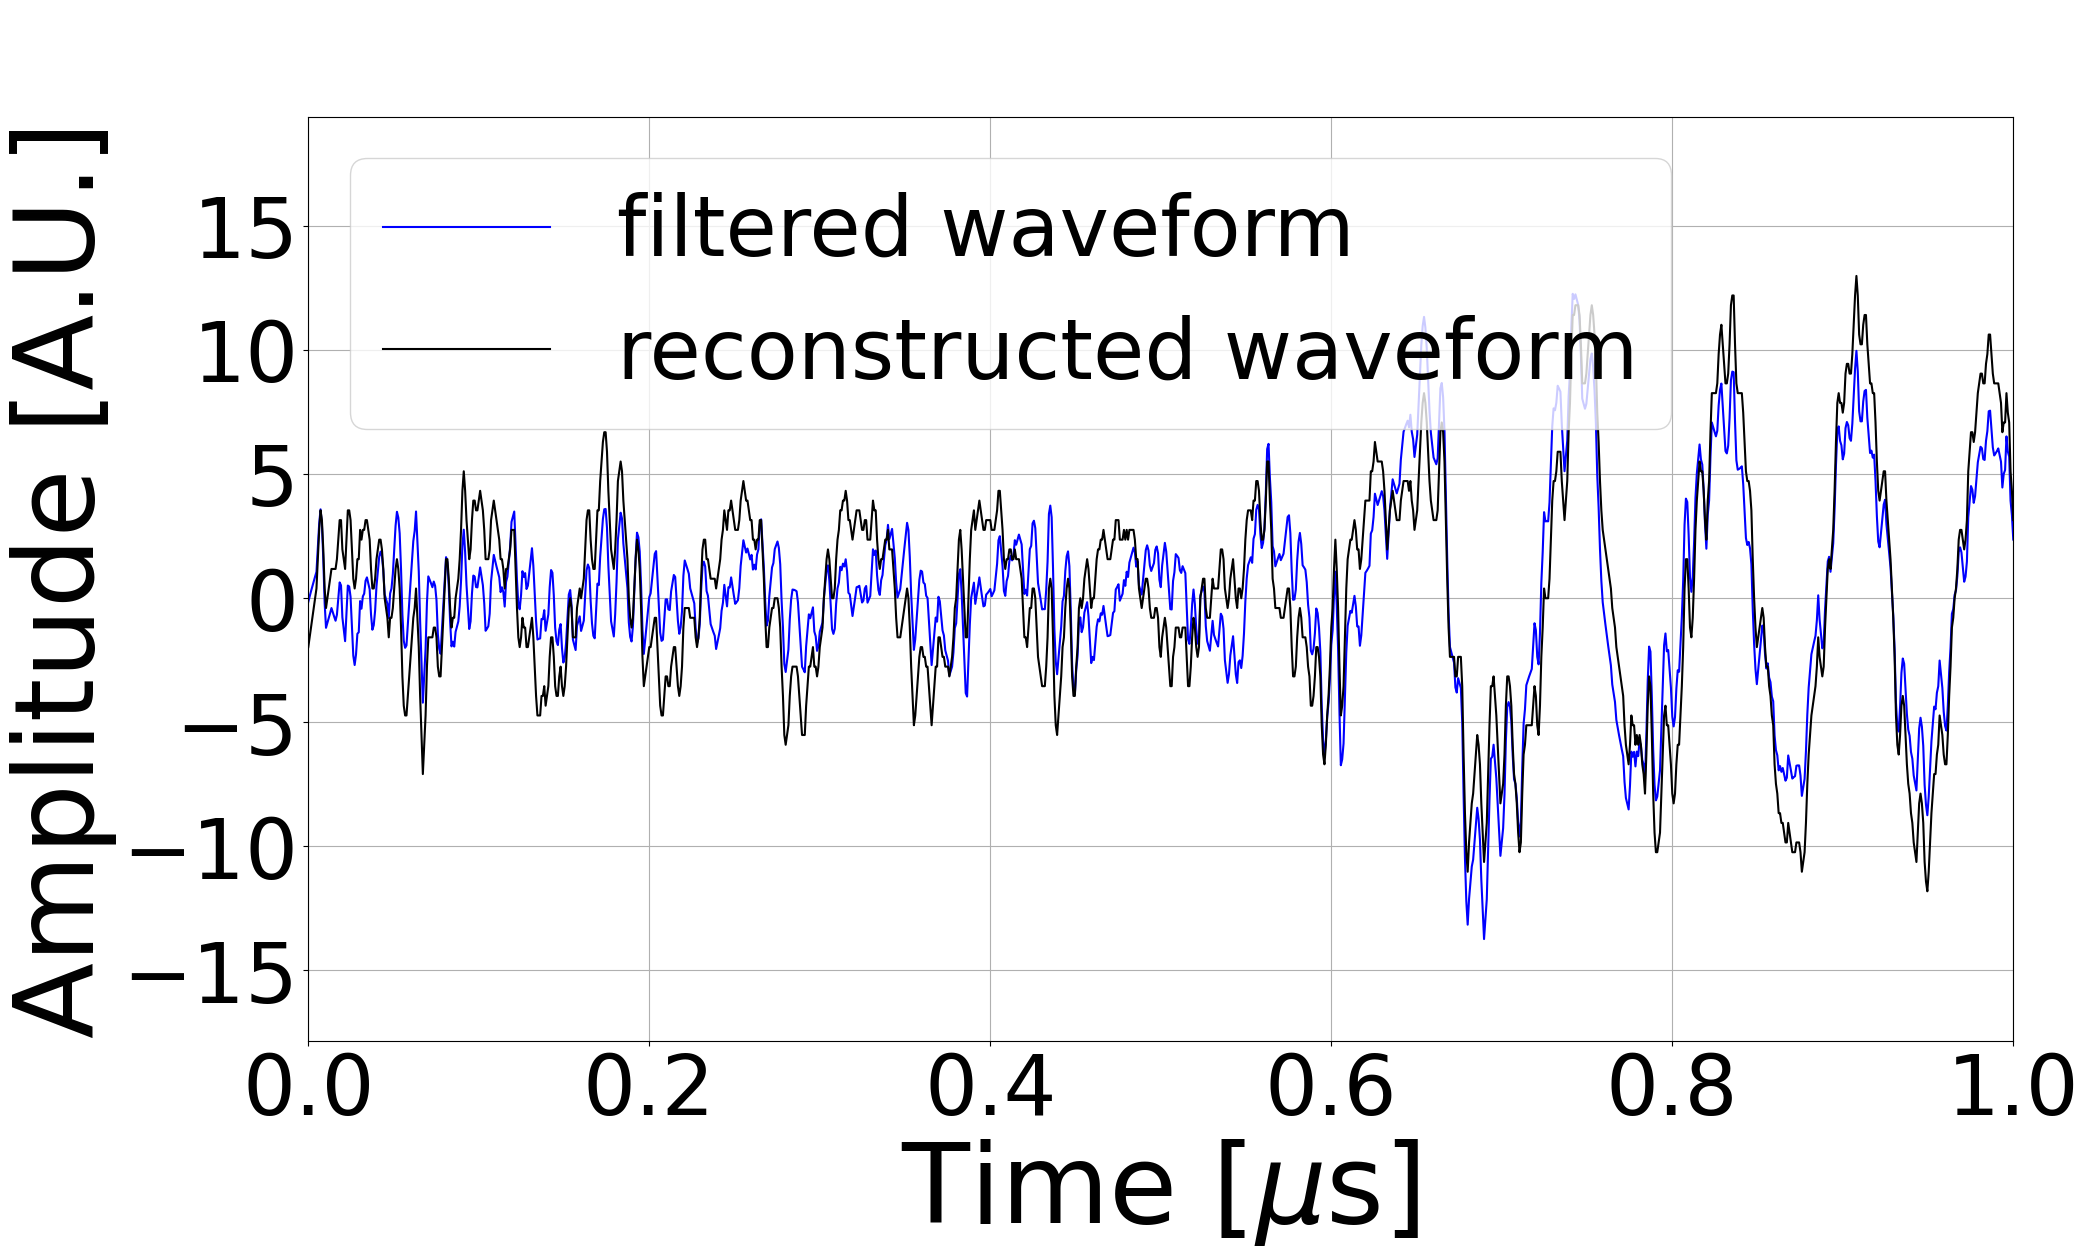

In [20]:
plt.figure(figsize = (22, 12))
plt.plot(times, filtered_wf.real, label = 'filtered waveform', color = 'blue') 
plt.plot(times, reconstructed_wf.real, label = 'reconstructed waveform', color = 'k')

plt.title(' ', fontsize = 80)
plt.xlabel(r'Time [$\mu$s]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Amplitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 60)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("../Results/080824_15.42/Presentation/filtered_single_wf.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [21]:
noise_wf = reconstructed_wf - filtered_wf #both complex numbers arrays

In [22]:
A = max(noise_wf.real)
phi = phases[freqs == peak_f[0]]
f = peak_f[0]
coswave = A*np.cos(f * 2*np.pi*times + phi)

[-0.07093796 -0.07417148 -0.07706083 ... -0.21145095 -0.22529406
 -0.23809132]


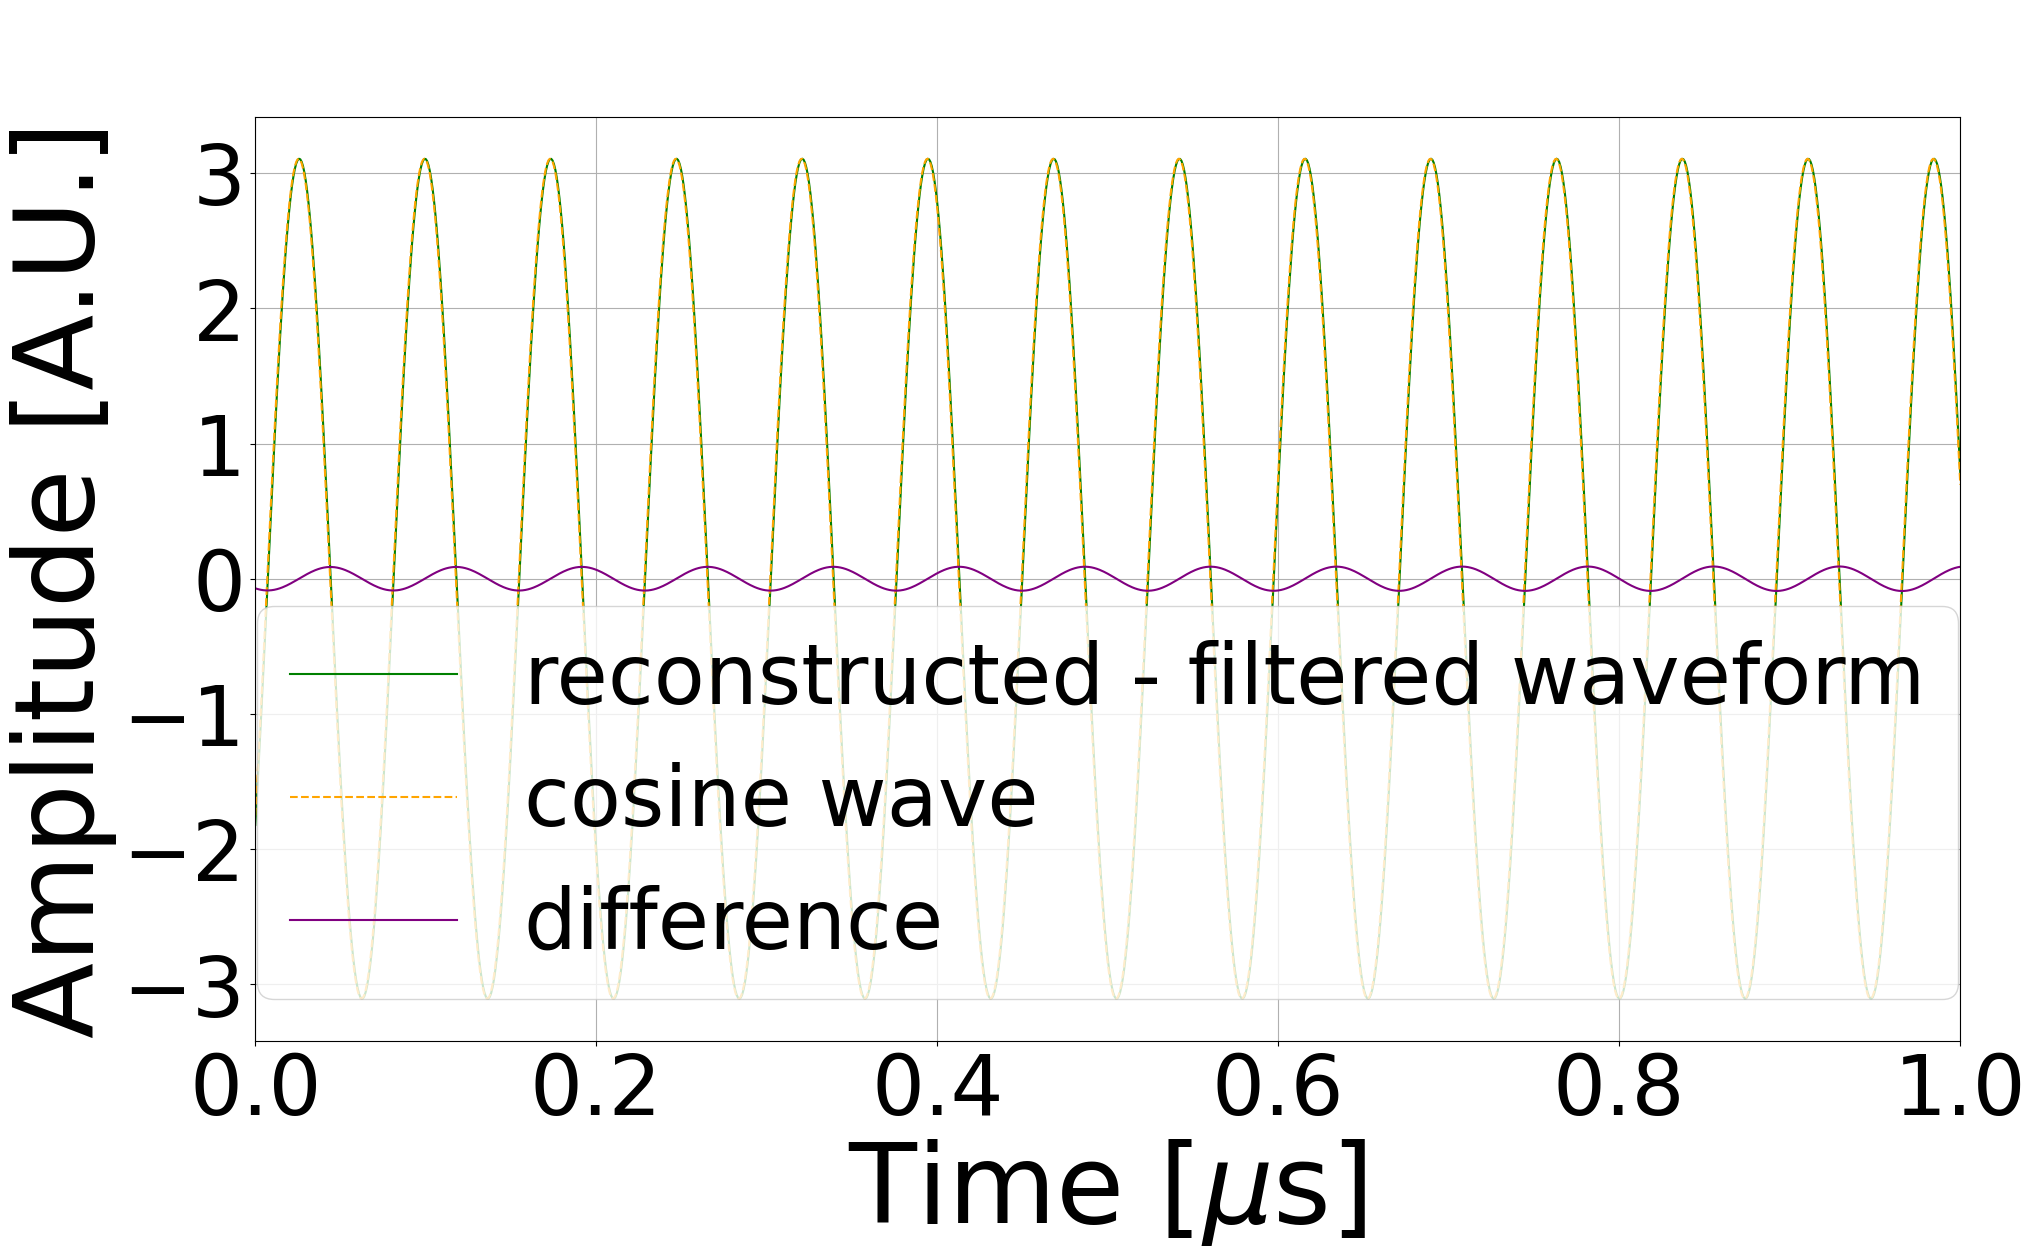

In [23]:
plt.figure(figsize = (22, 12))
plt.plot(times, noise_wf.real, label = 'reconstructed - filtered waveform', color = 'green')
plt.plot(times, coswave, label = 'cosine wave', color = 'orange', linestyle = '--')
plt.plot(times, noise_wf.real - coswave, label = 'difference', color = 'purple')
print(noise_wf.real - coswave)

plt.title(' ', fontsize = 80)
plt.xlabel(r'Time [$\mu$s]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Amplitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 60)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [24]:
print(np.arccos((noise_wf.real)[times == 0]/A)*180/np.pi)
print(np.arccos((coswave)[times == 0]/A)*180/np.pi)

[125.89925518]
[124.30009813]


# Make sure reconstructed waveform and original waveform are the same

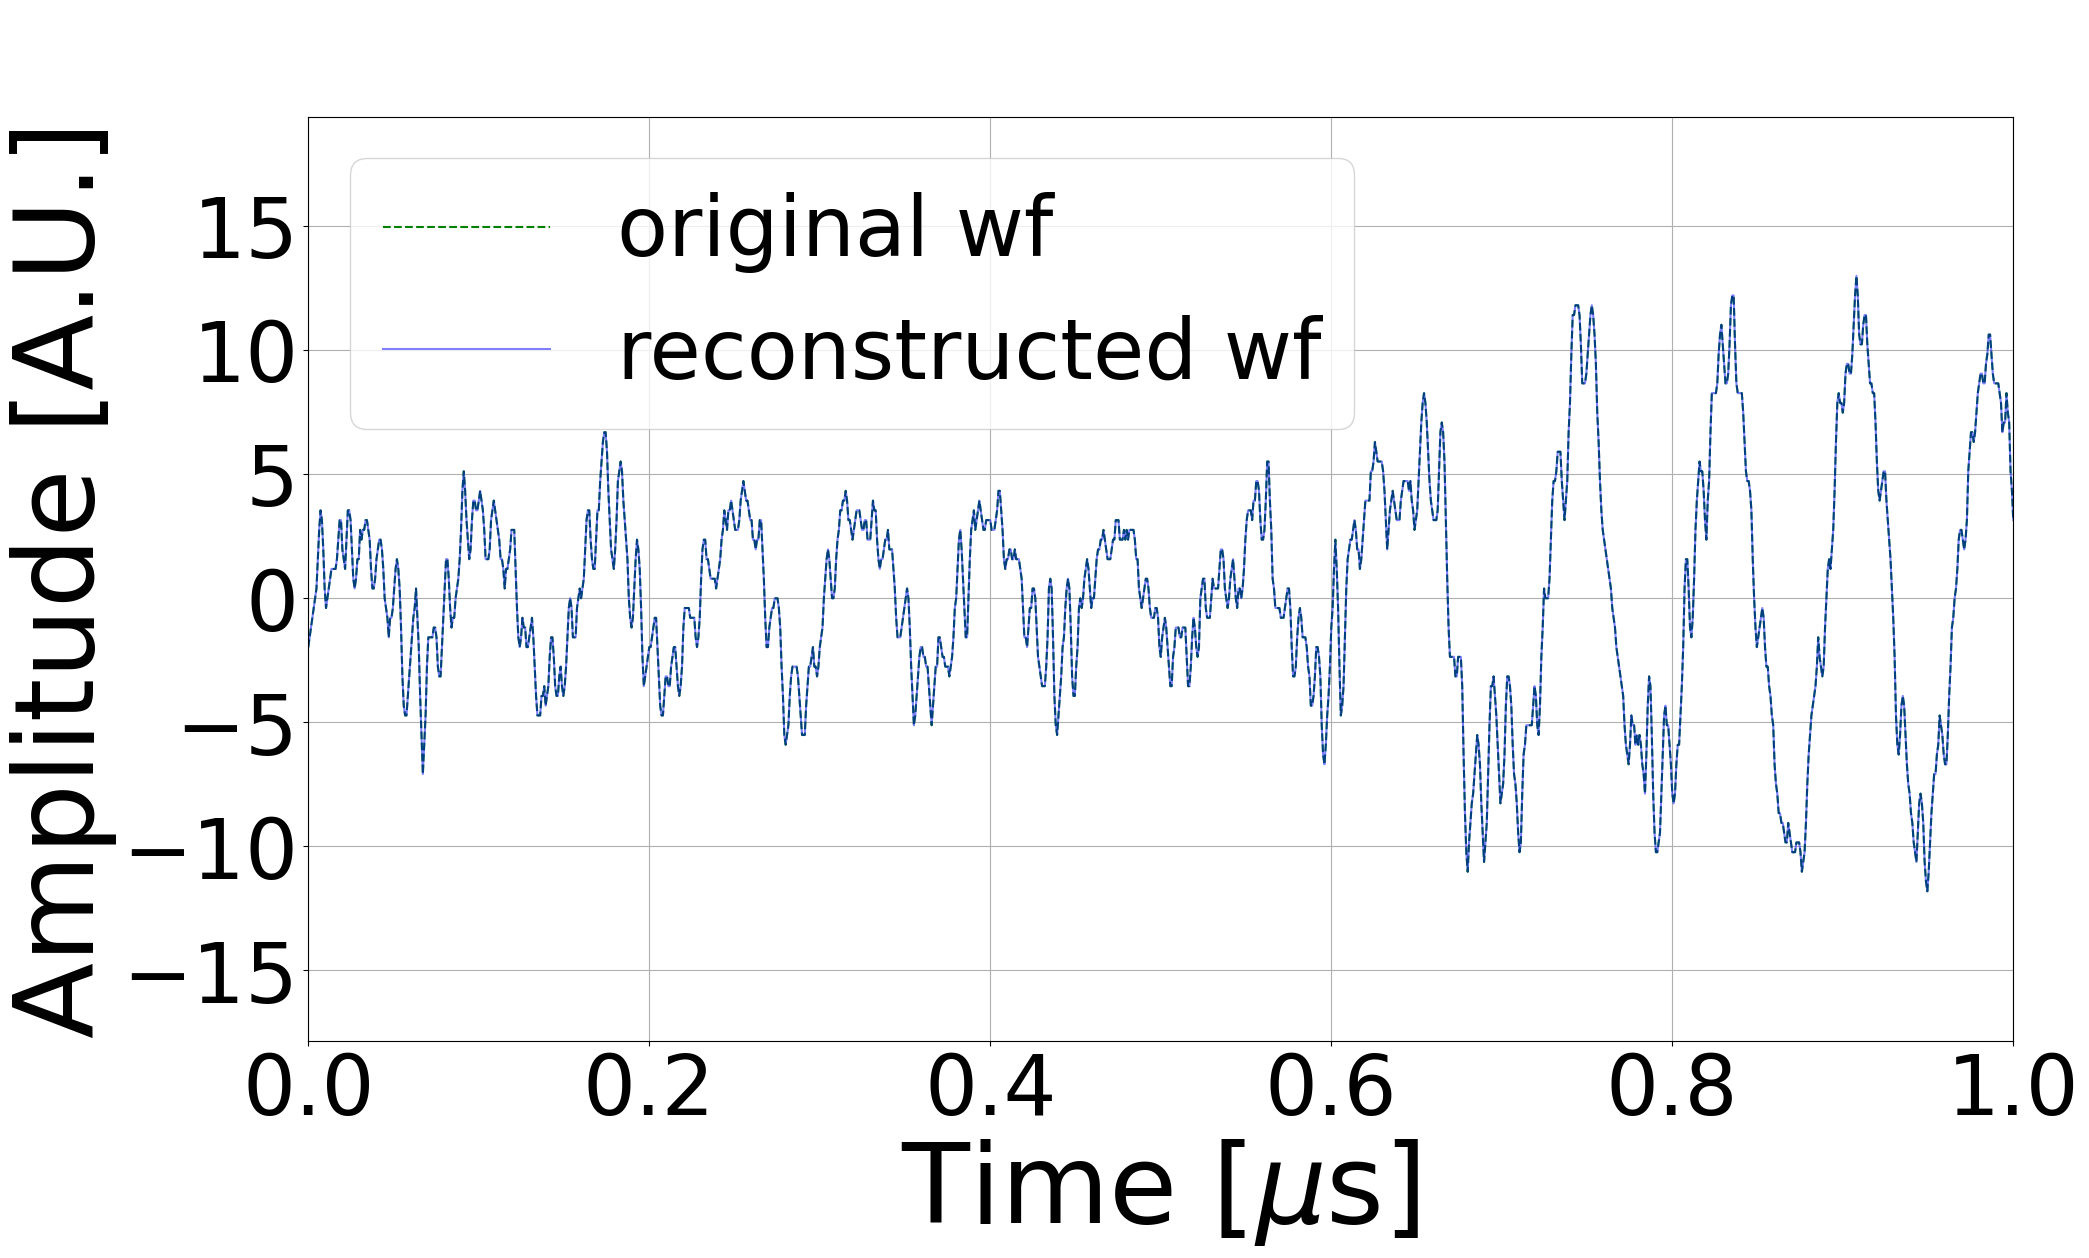

In [25]:
plt.figure(figsize = (22, 12))
plt.plot(times, amplitudes, label = 'original wf', color = 'green', linestyle = '--')
plt.plot(times, reconstructed_wf.real, label = 'reconstructed wf', color = 'blue', alpha = 0.5)

plt.title(' ', fontsize = 80)
plt.xlabel(r'Time [$\mu$s]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Amplitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 60)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

# Plot reconstructed FFT

In [26]:
reconstructed_filtered_fft = fft.fft(filtered_wf)

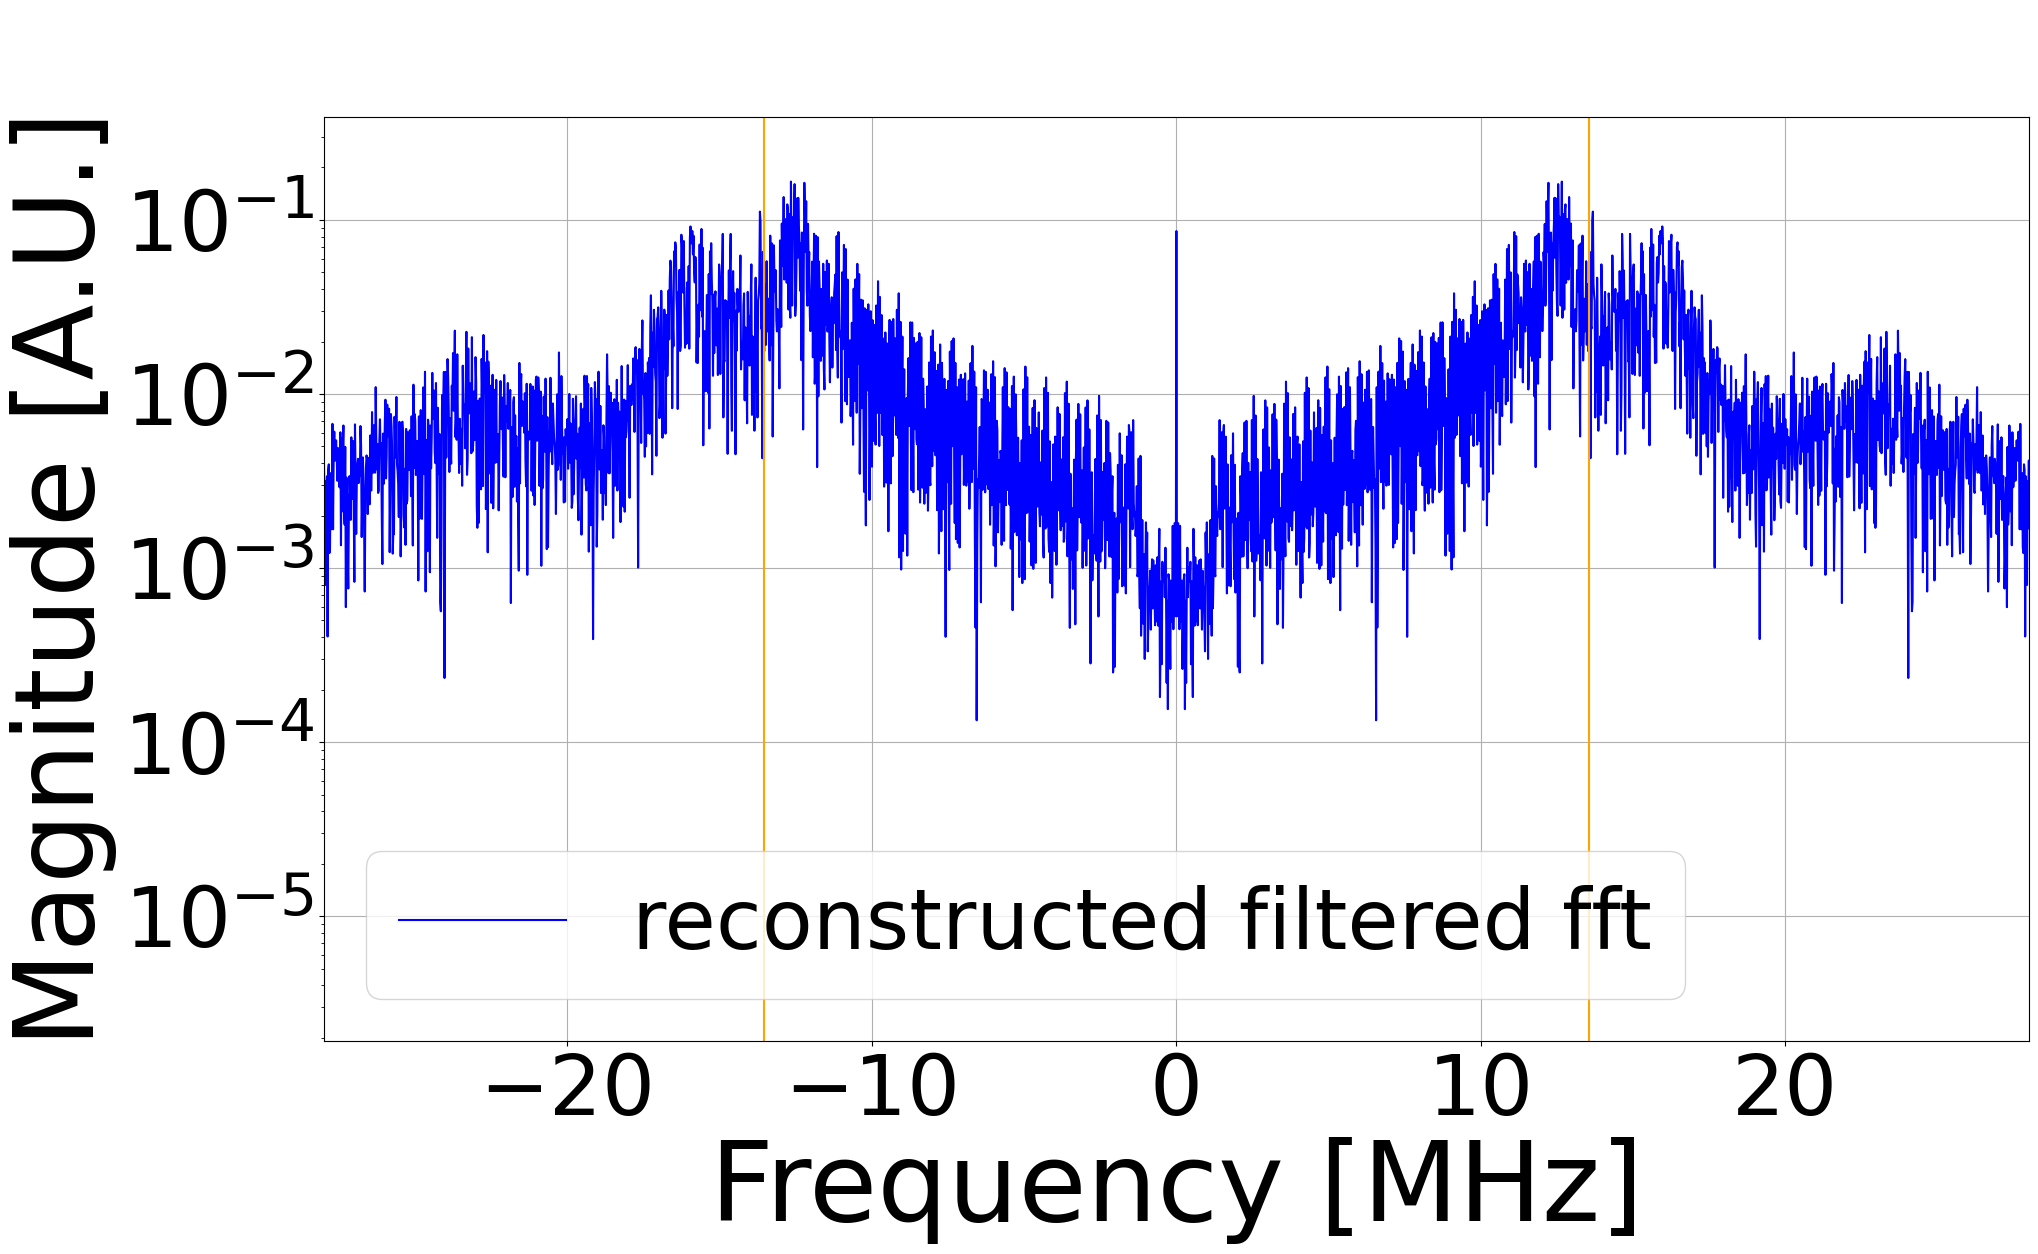

In [27]:
reconstructed_filtered_fft_shifted = fft.fftshift(reconstructed_filtered_fft) 

plt.figure(figsize=(22, 12))
plt.plot(freqs_shifted, np.abs(reconstructed_filtered_fft_shifted)/n, color = 'blue', label = 'reconstructed filtered fft')
plt.axvline(peak_f[0], color = 'orange')
plt.axvline(peak_f[1], color = 'orange')

plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [MHz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.xlim(-f2*2, f2*2)
plt.legend(loc = 'best', fontsize = 60)
plt.semilogy()

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [28]:
if (N%2 == 0):
    pos_reconstructed_filtered_fft = reconstructed_filtered_fft[:round((N/2))]
else:
    pos_reconstructed_filtered_fft = reconstructed_filtered_fft[:round((N-1)/2 + 1)]

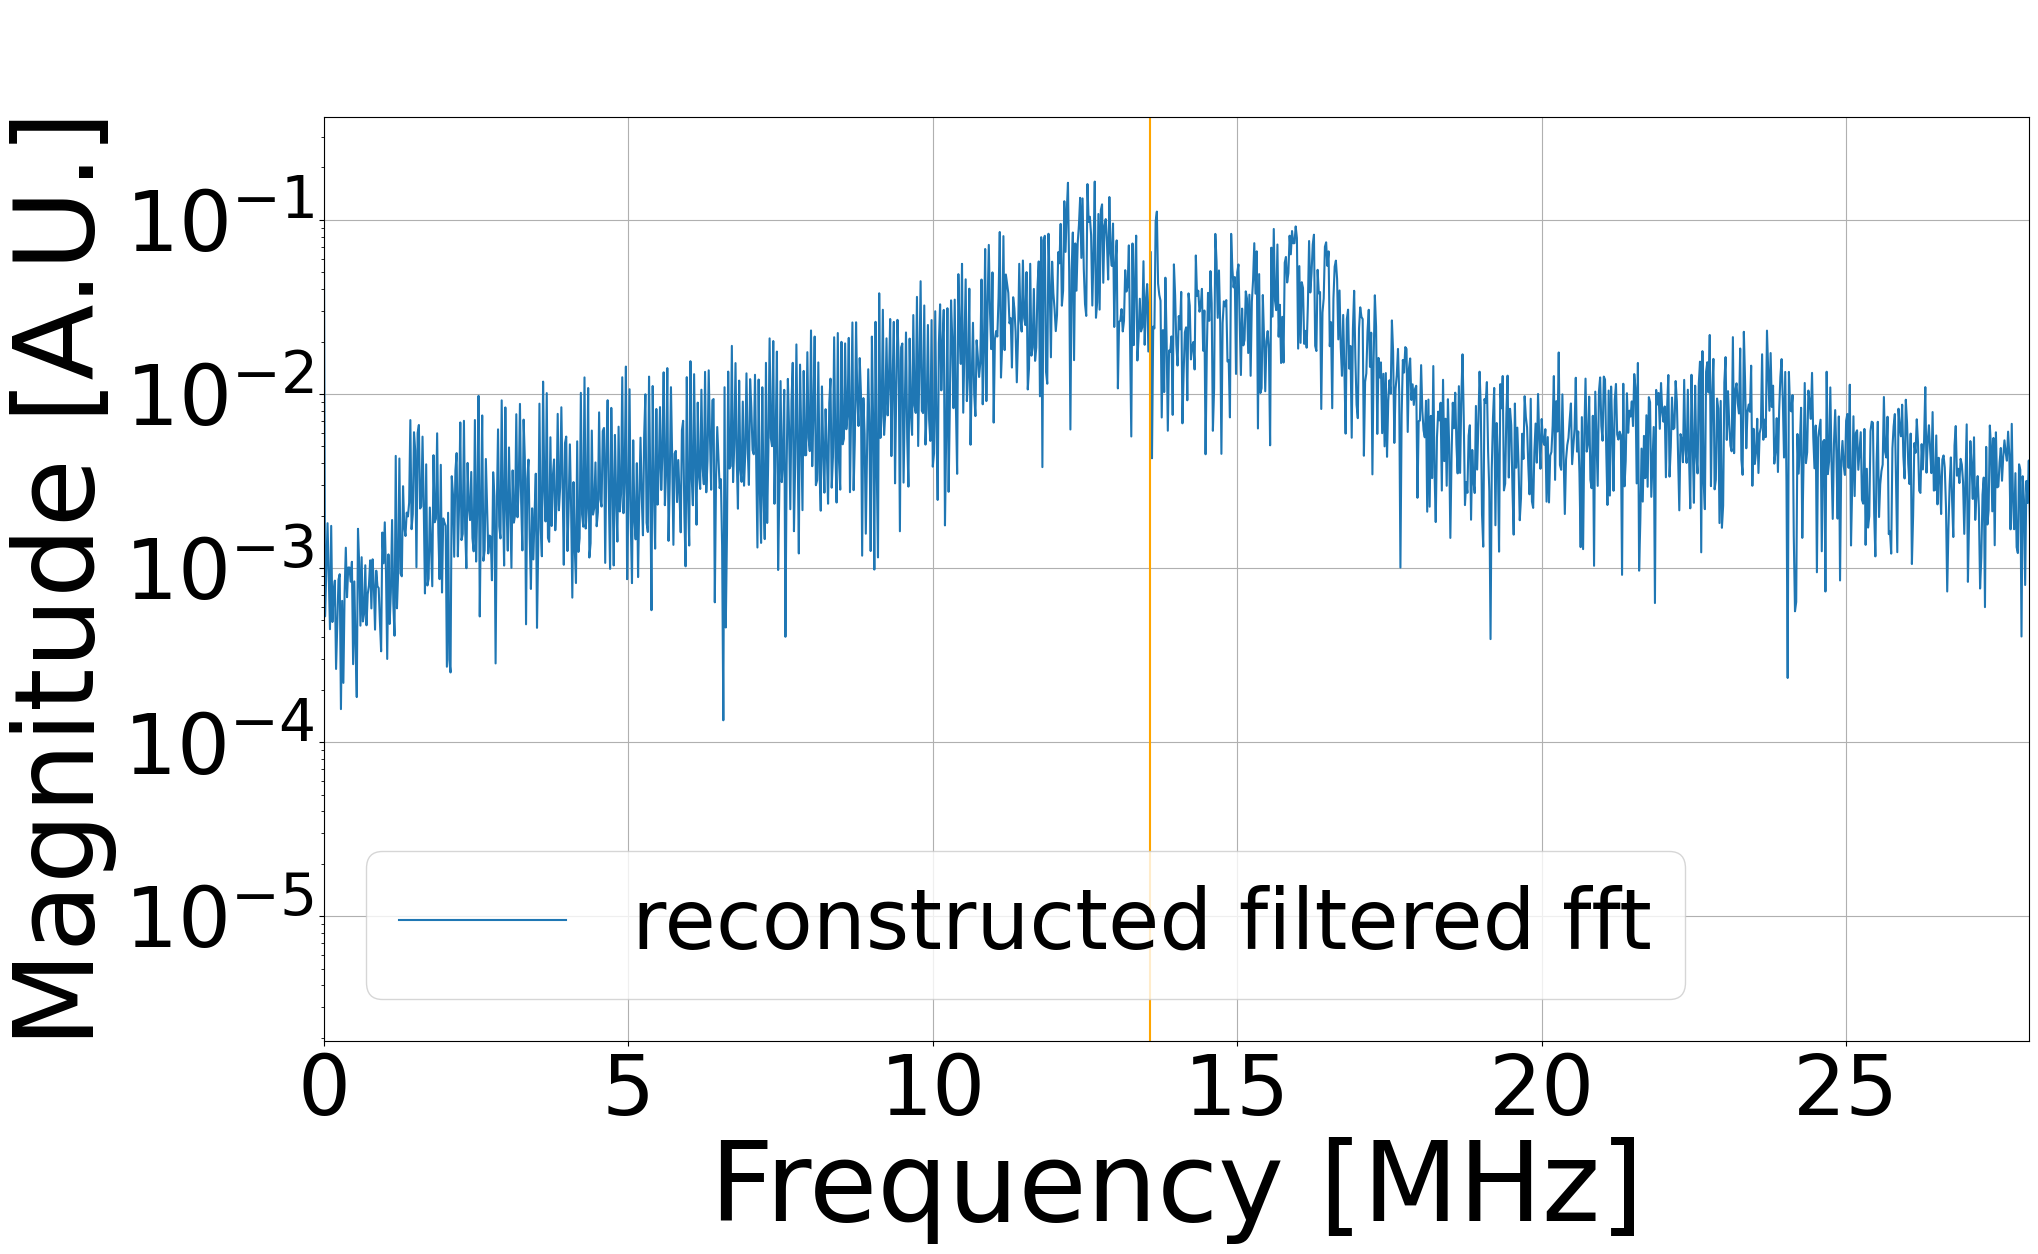

In [29]:
plt.figure(figsize = (22, 12))
plt.plot(pos_freqs, np.abs(pos_reconstructed_filtered_fft)/n, label = 'reconstructed filtered fft')
plt.axvline(peak_f[0], color = 'orange')

plt.title(' ', fontsize = 80)
plt.xlabel(r'Frequency [MHz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.semilogy()

plt.xlim(0, f2*2)
plt.legend(loc = 'best', fontsize = 60)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()